# Simulating a Raman transition with laser pulses
This tutorial builds on the first tutorial. \
We simulate the same system as in the first tutorial but with a time-dependent Rabi frequency of both lasers.

In [2]:
from atomcalc import Level, Laser, Decay, System, plot_pulse
import numpy as np

We use the same parameters as in the first tutorial.

In [3]:
# define level objects
level1 = Level(0)
level2 = Level(20)
level3 = Level(100)

# define decay object
decay = Decay([0,0],[[level3,level1],[level3,level2]]) # no decay

# define parameters
Delta = 20
delta = 0
Omega1 = 1
Omega2 = 1

We define the pulses as functions depending on t. Here, we define gaussian pulses. \
`plot_pulse` is just a little function to draw the pulse with matplotlib.

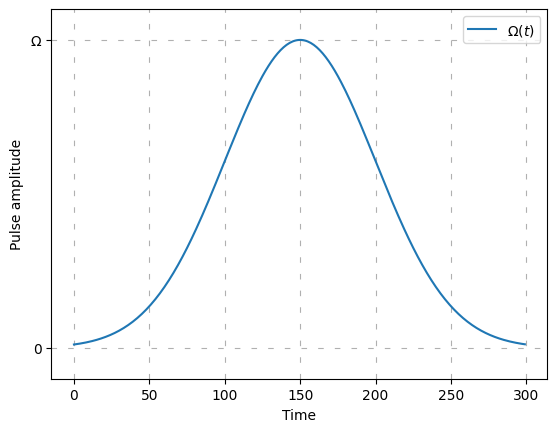

In [4]:
def pulse_1(t):
    return Omega1 * np.exp(-0.5 * ((t - 150) / (50)) ** 2)

def pulse_2(t):
    return Omega2 * np.exp(-0.5 * ((t - 150) / (50)) ** 2)

plot_pulse(pulse_1, range(0, 300, 1))

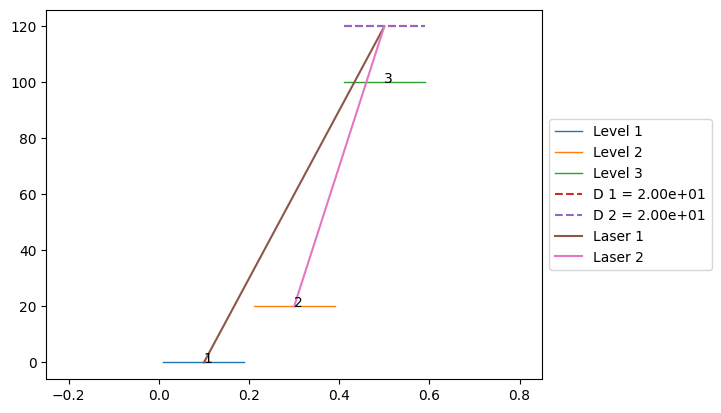

In [5]:
# System
laser1 = Laser(Omega1, Delta, [level1, level3], pulse=pulse_1)
laser2 = Laser(Omega2, Delta - delta, [level2, level3], pulse=pulse_2)
system = System([level1, level2, level3], [laser1, laser2], decay)
system.draw()


The Trotter intervals determine how the pulse is discretized. In my master thesis this is explained in detail in the method and the appendix section. An excerpt is shown following this tutorial \
A Trotter interval is a time interval in which the pulse is assumed to be constant. \
A Trotter step is the distance in time where the population of the levels is calculated. \
In this example we calculate the population for every 3 time units and the pulse is assumed to be constant over time intervals of 6 time units.

Hamiltonian in the rotating frame: [[ 0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j 20.+0.j]]
One trotterinterval has size 6.0.
One trotter step has size 3.0.


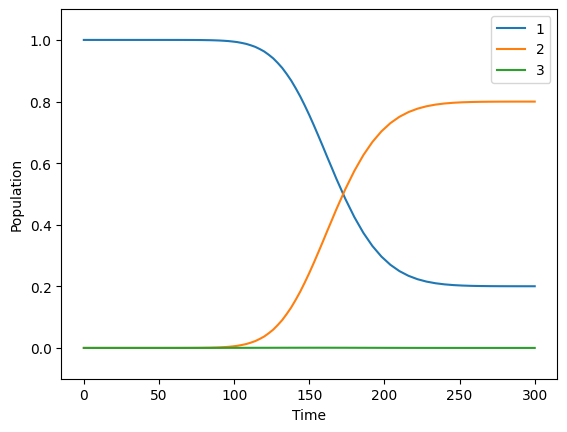

Maximum population of level 2:


0.7997789543219783

In [6]:
# calculate and show the time evolution
system.simulate([1, 0, 0],1,300,Diagonalization=True,Trotterintervals=50,points_per_TI=2)

## Trotter decomposition (excerpt of my master thesis)


<img src="../images/Trotterdecomposition.PNG" width="600px">

This Figure shows the Trotter decomposition of a timeline and visualizes the parameters of the sourcecode. The illustration is done with `number_TI = 5` and `points_per_TI = 2`. The time discretization `td` defines the Trotter intervals where the respective Liouvillian `L[n]` is constant. The `trotter_step` defines the points in time where the density matrix is calculated.

For every Trotter interval the respective Liouvillian is constant and for every `trotter_step` a density matrix is calculated. There are two conditions for the code to work: The number of Trotter intervals `number_TI` must be chosen so that the Trotter intervals have integer time. Additionally, `points_per_TI` must be chosen so that `trotter_step` is integer. Together that means $\frac{\texttt{maxtime}}{\texttt{number\_TI}\cdot \texttt{points\_per\_TI}}$ has to be an integer. In the illustrated example this would be fulfilled for `maxtime = 10`, for example.